In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('dogs_cats.csv', delimiter=',')

In [ ]:
df.head()

,Unnamed: 0,comprimento,peso,classe
0,0,45.231415,431.548671,cachorro
1,1,38.003753,517.870914,gato
2,2,53.608592,444.025762,cachorro
3,3,39.315731,524.066579,gato
4,4,45.581301,450.552000,cachorro


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
comprimento,0
peso,0
classe,0


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
comprimento,0
peso,0
classe,0


In [ ]:
y = df['classe']

In [ ]:
y = [1 if i == 'cachorro' else 0 for i in y]

In [ ]:
y[:5]

[1, 0, 1, 0, 1]

In [ ]:
x = df[['comprimento', 'peso']]

In [ ]:
x.head(5)

,comprimento,peso
0,45.231415,431.548671
1,38.003753,517.870914
2,53.608592,444.025762
3,39.315731,524.066579
4,45.581301,450.552000


In [ ]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

In [ ]:
x = np.array(df[['comprimento','peso']])

y = np.array(y).T

print(x.shape, y.shape)

(2000, 2) (2000,)


Pesos: [799.50833974 -61.02859604]
Bias: -80.31675391930393
Predicao: [ 9745.76719142 -1300.93437715 15681.9304095  ...   -87.23666135
  8020.2745062  -3475.75605907]


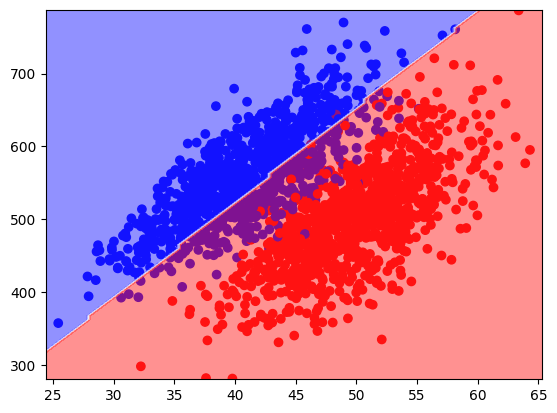

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1
learning_rate = 1e-2

for step in range(0, 1000):
  cost = 0
  for x_n, y_n in zip(x, y):
    y_pred = np.dot(x_n, w) + b
    y_pred = np.where(y_pred > 0, 1, 0)
    error = y_n - y_pred
    w = w + learning_rate*np.dot(error, x_n)
    b = b + learning_rate*error
    cost += error**2
  #if step % 10 == 0:
  #    print('Step {0}: {1}'.format(step, cost))

  if cost == 0:
    print('Step {0}: {1}'.format(step, cost))
    print("Custo zero, finalizando algoritmo")
    break
print('Pesos: {0}'.format(w))
print('Bias: {0}'.format(b))
print('Predicao: {0}'.format(np.dot(x, np.array(w))+b))
plot_linear_classifier(x, y, w, b)